# Using the Gaussian State Toolkit

*Ryan P. Marchildon*

Gaussian states can be fully described by a covariance matrix and displacement vector, using a phase-space representation where we have phase quadratures "x" and "p" associated with each mode. Different modes refer to different eigenstates of a degree of freedom, such as optical path or polarization. Using a formalism called "simplectic transformations", we can evolve N-mode Gaussian states simply by transforming their covariance matrix and displacement vector, without the need to compute the full Wigner function (which is far more computationally expensive). 

The simplectic transformation recipes used in this toolkit are outlined in the following references:
1. Stefano Olivares, "Quantum optics in the phase space", <a href="https://arxiv.org/abs/1111.0786" target="_blank">ArXiv:1111.0786v2</a> (2011).
2. Alessandro Ferraro, Stefano Olivares, and Matteo G. A. Paris, "Gaussian states
    in continuous variable quantum information" <a href="https://arxiv.org/abs/quant-ph/0503237" target="_blank">ArXiv:quant-ph/0503237</a> (2005).
    
The code below provides a working example of the toolkit in action. 
    
You can download the toolkit source code <a href="https://github.com/Ryan-Marchildon/gaussian-state-sim/tree/master" target="_blank">here</a> from github. 


#### Import Libraries

In [1]:
import GaussianStateTools as gs
import numpy as np
from IPython.display import HTML, display

%matplotlib inline 

#### Useful Helper Functions:

In [2]:
def print_covariance_matrix(sigma_):
    print('Covariance Matrix:')
    display(HTML('<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join('<td>{}</td>'.format(
            '</td><td>'.join(str(_) for _ in row)) for row in sigma_))))

***

### 1) Unitary Transformations

Unitary transformations do not involve any dissipation (information loss to the environment or other systems, caused by optical loss or interactions). These transformations include squeezing, displacement, rotation, and two-mode mixing (the beamsplitter operation). 

Below we'll see how these transformations are easily implemented with our toolkit. 

#### a) Basic One-Mode Examples:

First we'll initialize and plot a one-mode Gaussian state (which begins in vacuum).

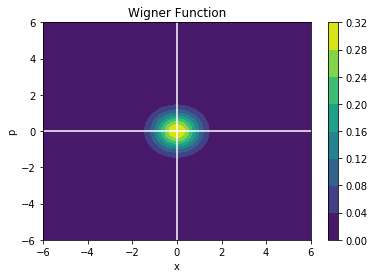

In [3]:
psi_1 = gs.GaussianState(n_modes=1)  # initialize instance of class GaussianState()
wigner_1 = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                            range_min=-6, range_max=6, 
                                            range_num_steps=100)
wigner_1.plot()

Next we'll sequentially squeeze, displace, and rotate this state, plotting the Wigner function after each step:

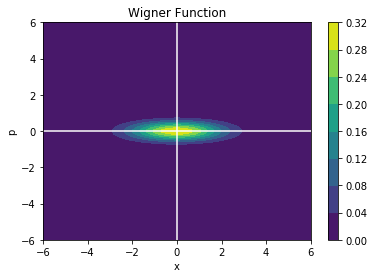

In [4]:
# Squeeze...
# Note: beta_mag = r (the squeezing parameter)
psi_1.single_mode_squeeze(mode_id=1, beta_mag=0.7, beta_phase=0)  
wigner_1A = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                             range_min=-6, range_max=6, 
                                             range_num_steps=100)
wigner_1A.plot()

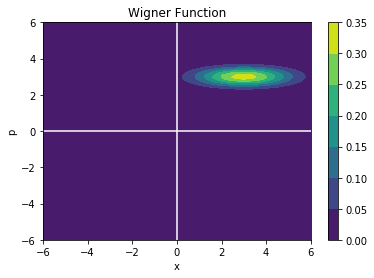

In [5]:
# ...displace...
# alpha_mag and alpha_phase set the coherent magnitude and phase of the displacement
psi_1.displace(mode_id=1, alpha_mag=3, alpha_phase=np.pi/4)  
wigner_1B = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                             range_min=-6, range_max=6, 
                                             range_num_steps=100)
wigner_1B.plot()

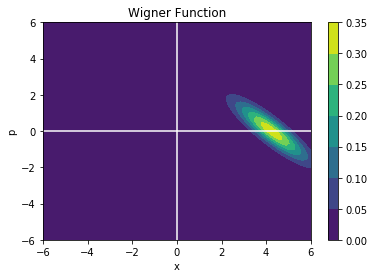

In [6]:
# ...and rotate state
psi_1.rotate(mode_id=1, phase=np.pi/4) # 45 degree rotation (pi/4)
wigner_1C = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                             range_min=-6, range_max=6, 
                                             range_num_steps=100)
wigner_1C.plot()

Next, we'll generate a second state, with slightly different transformation parameters, and compare its fidelity with the first:

The Wigner Function Overlap Between States 1 and 2 is: 0.758367735777
The Ulhmann Fidelity Between States 1 and 2 is: 0.7498749153556576
The Wigner Function Overlap of State 1 with Itself is: 1.0
The Ulhmann Fidelity of State 1 with Itself is: 1.0




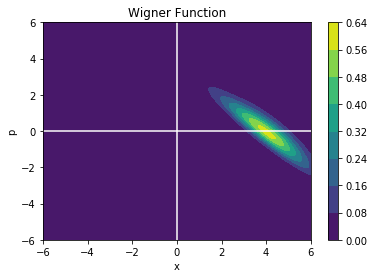

In [7]:
psi_2 = gs.GaussianState(n_modes=1)
psi_2.single_mode_squeeze(mode_id=1, beta_mag=1, beta_phase=0)
psi_2.displace(mode_id=1, alpha_mag=2.7, alpha_phase=np.pi/4)
psi_2.rotate(mode_id=1, phase=np.pi/4)

wigner_2 = gs.OneModeGaussianWignerFunction(state=psi_2, 
                                            range_min=-6, range_max=6, 
                                            range_num_steps=100)

print('The Wigner Function Overlap Between States 1 and 2 is:', 
      gs.WignerOverlap(wigner_1C, wigner_2))
print('The Ulhmann Fidelity Between States 1 and 2 is:',
      gs.OneModeFidelity(psi_1, psi_2))
print('The Wigner Function Overlap of State 1 with Itself is:', 
      gs.WignerOverlap(wigner_1C, wigner_1C))
print('The Ulhmann Fidelity of State 1 with Itself is:', 
      gs.OneModeFidelity(psi_1, psi_1))
print('\n')

# Visualize the overlap:
# initialize such that we share the same x_mesh and p_mesh
wigner_sum = wigner_1C  
# reassign values, adding both wigner functions together
wigner_sum.values = (wigner_1C.values + wigner_2.values)  
wigner_sum.plot()

#### Basic Two-Mode Examples:

Next we'll generate and plot a two-mode squeezed state. Note that computing Wigner functions becomes very computationally expensive, so we'll need to keep the sampling low. Thankfully, we don't need to compute the wigner function to obtain state fidelities, so we can easily represent multi-dimensional states without hitting computational bottlenecks. I generally use the Wigner function (or slices thereof) only for visualization.

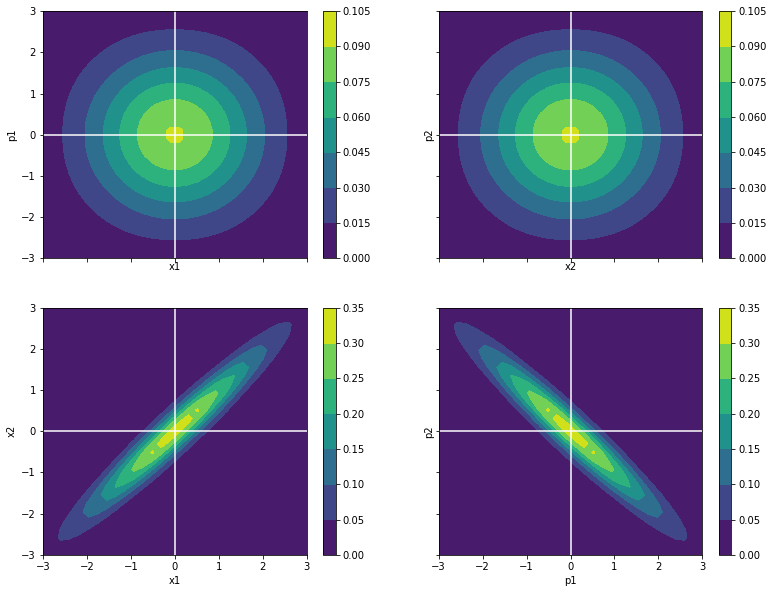

In [8]:
psi_3 = gs.GaussianState(n_modes=2)
psi_3.two_mode_squeeze(mode_1_id=1, mode_2_id=2, beta_mag=1.0, beta_phase=0.0)
wigner_3 = gs.TwoModeGaussianWignerFunction(state=psi_3, 
                                            range_min=-3, range_max=3, 
                                            range_num_steps=30)
wigner_3.plot_all() # see Figure 3(b) in "Squeezed Light" review article by Lvovsky.

Now we will show interconversion between a two-mode squeezed state and two single-mode squeezed states, mediated by a 50:50 beamsplitter:

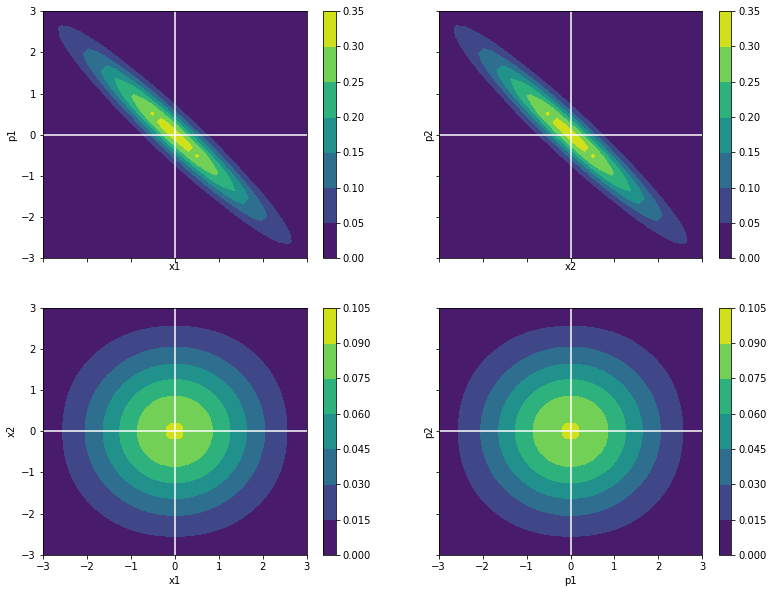

In [9]:
psi_3_before = psi_3.copy() # save the prior state, for later comparision
psi_3.two_mode_mix(mode_1_id=1, mode_2_id=2, R0=0.5)  # mix both modes through a 50:50 splitter
wigner_3_after = gs.TwoModeGaussianWignerFunction(state=psi_3, 
                                                  range_min=-3, range_max=3, 
                                                  range_num_steps=30)
wigner_3_after.plot_all()

The correlations between x1-x2 and p1-p2 have been transferred to x1-p1 and x2-p2. Let's compute the two-mode overlaps and Uhlmann fidelities, before and after the beamsplitter transformation:

In [10]:
print('Wigner Function Overlap, Before vs After Beamsplitter, is: %.3f' 
      % gs.WignerOverlap(wigner_3, wigner_3_after))
print('Check: wigner_3 overlap with itself is: %.3f' 
      % gs.WignerOverlap(wigner_3, wigner_3))
print('\nUhlmann Fidelity of States, Before vs After Beamsplitter, is %.3f' 
      % gs.TwoModeFidelity(psi_3, psi_3_before))
print('Check: Uhlmann Fidelity of psi_3 with itself is: %.3f' 
      % gs.TwoModeFidelity(psi_3, psi_3))

Wigner Function Overlap, Before vs After Beamsplitter, is: 0.133
Check: wigner_3 overlap with itself is: 1.000

Uhlmann Fidelity of States, Before vs After Beamsplitter, is 0.132
Check: Uhlmann Fidelity of psi_3 with itself is: 1.000


Note that in general, for N-mode states, it is better to compute Uhlmann fidelities instead of overlaps due to the high computational expense of the latter; I have included the Wigner function overlap here only as validation.

***

### 2) Dissipative (Lossy) Transformations:

Next, we show how we can also implement non-unitary dissipative transformations that model optical loss. We treat losses as a lumped beamsplitter of specified transmission, which mixes the optical mode with the environment (introducing vacuum noise). 

#### a) One-Mode

First we'll initialize, squeeze, and displace a one-mode state. We'll also plot its Wigner function and print its covariance matrix. 

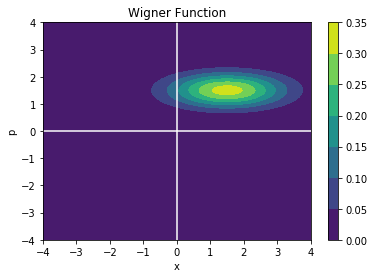

Covariance Matrix:


In [11]:
psi_1 = gs.GaussianState(n_modes=1)
psi_1.single_mode_squeeze(mode_id=1, beta_mag=0.5, beta_phase=0) 
psi_1.displace(mode_id=1, alpha_mag=1.5, alpha_phase=np.pi/4)  

wigner = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                          range_min=-4, range_max=4, 
                                          range_num_steps=100)
wigner.plot()

print_covariance_matrix(psi_1.sigma)

Next we'll apply dissipation to this state (optical losses of 67%, i.e. transmission of 33%) and view the results. 

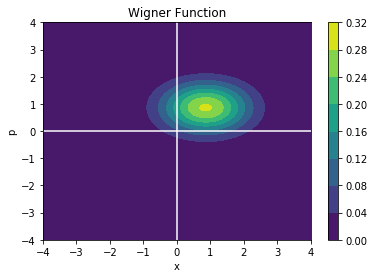

Covariance Matrix:


In [12]:
psi_1.dissipate(mode_id=1, transmission=0.33)
wigner = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                          range_min=-4, range_max=4, 
                                          range_num_steps=100)
wigner.plot()
print_covariance_matrix(psi_1.sigma)

Note that the diagonal terms of the covariance matrix have both shifted closer towards 0.5, which is the vacuum quadrature variance. The optical loss has mixed our squeezed quadratures with uncorrelated vacuum noise as we'd expect, reducing the overall squeezing of the state. The state has also shifted towards the x-p origin, since its coherent amplitude has been reduced. 

Let's also check the case where we set transmission to be 100%.

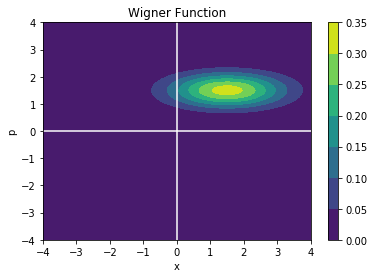

Covariance Matrix:


In [13]:
psi_1 = gs.GaussianState(n_modes=1)
psi_1.single_mode_squeeze(mode_id=1, beta_mag=0.5, beta_phase=0)
psi_1.displace(mode_id=1, alpha_mag=1.5, alpha_phase=np.pi/4) 
psi_1.dissipate(mode_id=1, transmission=1.0)

wigner = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                          range_min=-4, range_max=4, 
                                          range_num_steps=100)
wigner.plot()
print_covariance_matrix(psi_1.sigma)

Next, we check 0% transmission, which should return the vacuum state. 

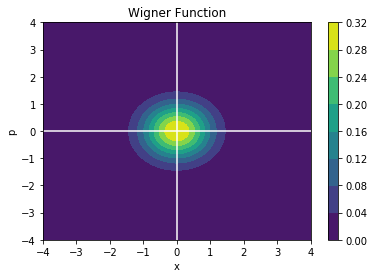

Covariance Matrix:


In [14]:
psi_1 = gs.GaussianState(n_modes=1)
psi_1.single_mode_squeeze(mode_id=1, beta_mag=0.5, beta_phase=0) 
psi_1.displace(mode_id=1, alpha_mag=1.5, alpha_phase=np.pi/4) 
psi_1.dissipate(mode_id=1, transmission=0.0)

wigner = gs.OneModeGaussianWignerFunction(state=psi_1, 
                                          range_min=-4, range_max=4, 
                                          range_num_steps=100)
wigner.plot()
print_covariance_matrix(psi_1.sigma)

#### b) Two Single-Mode Squeezed States

Next we initialize two single-mode squeezed states:

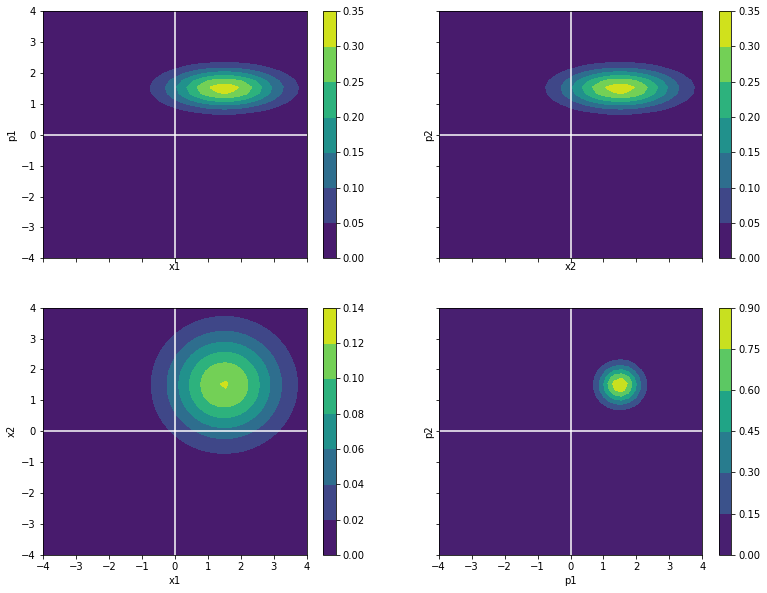

Covariance Matrix:


In [15]:
psi_2 = gs.GaussianState(n_modes=2)
psi_2.single_mode_squeeze(mode_id=1, beta_mag=0.5, beta_phase=0)
psi_2.single_mode_squeeze(mode_id=2, beta_mag=0.5, beta_phase=0)
psi_2.displace(mode_id=1, alpha_mag=1.5, alpha_phase=np.pi/4)
psi_2.displace(mode_id=2, alpha_mag=1.5, alpha_phase=np.pi/4)

wigner_2A = gs.TwoModeGaussianWignerFunction(state=psi_2, 
                                             range_min=-4, range_max=4, 
                                             range_num_steps=40)
wigner_2A.plot_all()

print_covariance_matrix(psi_2.sigma)

We'll apply dissipation to only one of these modes:

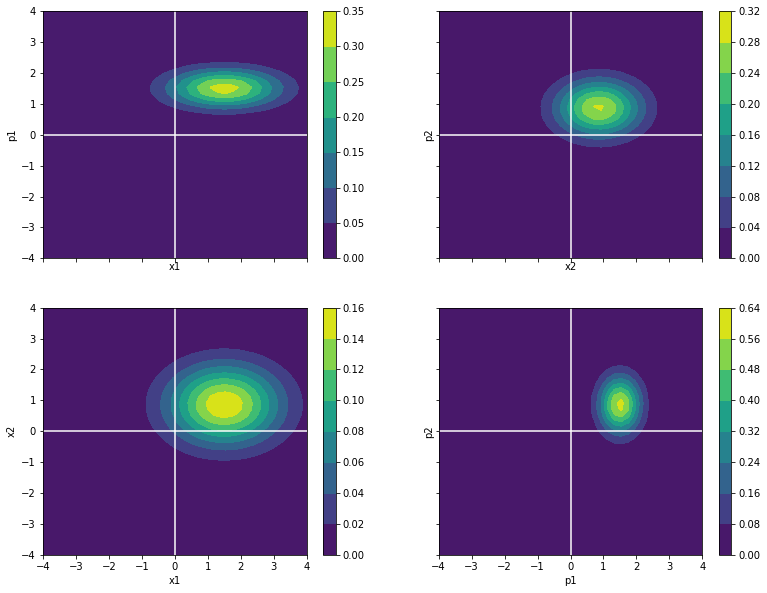

Covariance Matrix:


In [16]:
psi_2.dissipate(mode_id=2, transmission=0.33)
wigner_2B = gs.TwoModeGaussianWignerFunction(state=psi_2, 
                                             range_min=-4, range_max=4, 
                                             range_num_steps=40)
wigner_2B.plot_all() 
print_covariance_matrix(psi_2.sigma)

#### c) A Two-Mode Squeezed State

Finally, we'll initialize a two-mode squeezed state...

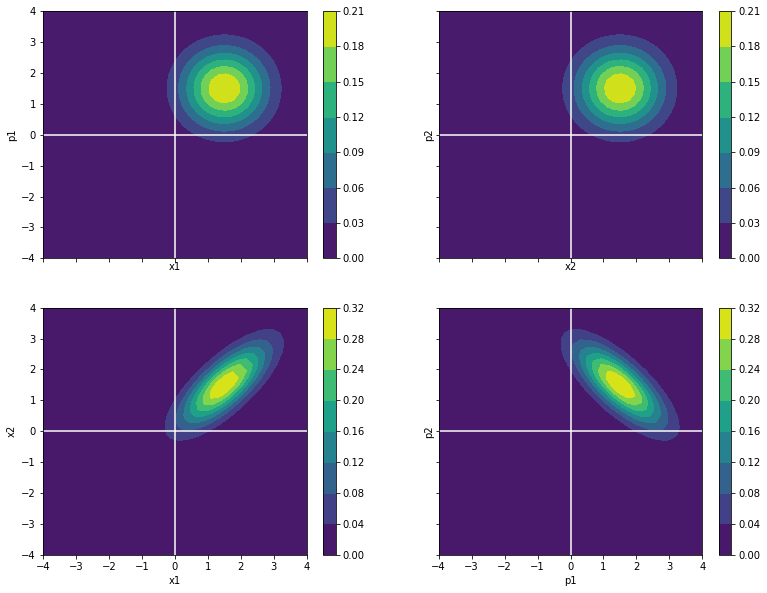

Covariance Matrix:


In [17]:
psi_3 = gs.GaussianState(n_modes=2)
psi_3.two_mode_squeeze(mode_1_id=1, mode_2_id=2, beta_mag=0.5, beta_phase=0.0)
psi_3.displace(mode_id=1, alpha_mag=1.5, alpha_phase=np.pi/4)
psi_3.displace(mode_id=2, alpha_mag=1.5, alpha_phase=np.pi/4)

wigner_3A = gs.TwoModeGaussianWignerFunction(state=psi_3, 
                                             range_min=-4, range_max=4, 
                                             range_num_steps=40)
wigner_3A.plot_all()  
print_covariance_matrix(psi_3.sigma)

...and apply dissipation to mode 2 only:

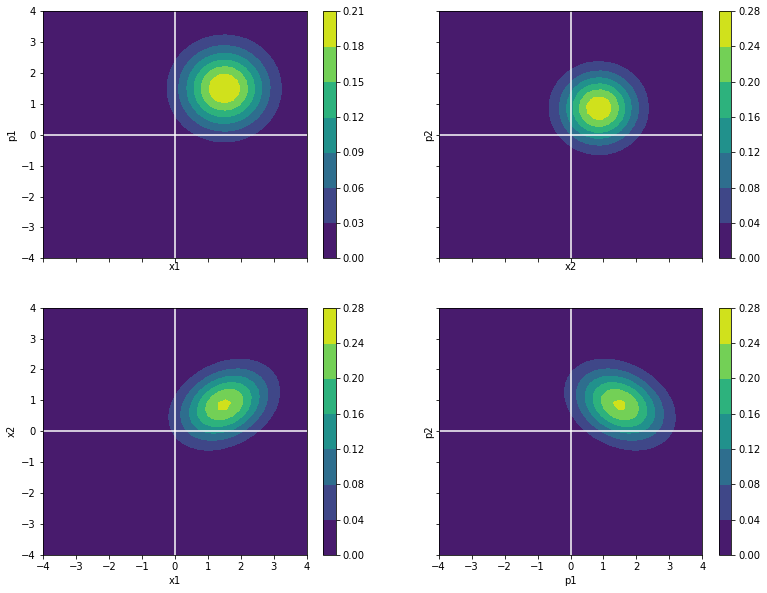

Covariance Matrix:


In [18]:
psi_3.dissipate(mode_id=2, transmission=0.33)
wigner_3B = gs.TwoModeGaussianWignerFunction(state=psi_3, 
                                             range_min=-4, range_max=4, 
                                             range_num_steps=40)
wigner_3B.plot_all() 
print_covariance_matrix(psi_3.sigma)

Since these modes are entangled, applying dissipation to only one of them nonetheless reduces the correlations in both the x1-x2 and p1-p2 quadrature slices. 

***

### Closing Remarks:

The GaussianStateTools library provides a simple object-oriented pipeline that makes it easier to simulate Gaussian state evolution through complex sets of transformations, such as quantum circuits. 

Its uses include: 
* designing integrated quantum circuits 
* simulating quantum computing protocols
* modeling experimental setups

To get started with the toolkit or contribute to its development, visit its source code <a href="https://github.com/Ryan-Marchildon/gaussian-state-sim/tree/master" target="_blank">here</a> at github.
